Exploratory Data Analysis of the BlueBikes dataset from June 2024

Author: Aidan Clark

6/27/24

Using a dataset from Boston BlueBikes: https://bluebikes.com/system-data
This dataset is contains trip histories on the BlueBike system and was published in June 2024
It appears that BlueBikes publishes datasets like this about every month.
BlueBikes processes this dataset to remove trips that are shorter than a minute

Useful resources:

https://towardsdatascience.com/be-a-more-efficient-data-scientist-today-master-pandas-with-this-guide-ea362d27386




Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading in dataset

In [2]:
blueBikes = pd.read_csv("../Data/bluebikes_trip_data_jun24.csv",
                        parse_dates = [2,3] #Parse started_at and ended_at as datetimes
                        )

In [3]:
dims = blueBikes.shape
print("There are " + str(dims[0]) + " trips and " + str(dims[1]) + " features")

There are 440534 trips and 13 features


In [4]:
blueBikes.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,2223D2584B189BDA,classic_bike,2024-05-29 13:40:33,2024-05-29 13:59:41,Bowdoin St at Quincy St,B32031,Christian Science Plaza - Massachusetts Ave at...,B32005,42.307852,-71.065122,42.343666,-71.085824,member
1,96EA32F96F1EDB68,classic_bike,2024-05-09 18:28:25,2024-05-09 18:36:00,Mugar Way at Beacon St,D32017,Blossom St at Charles St,D32050,42.355536,-71.072869,42.364356,-71.069594,member
2,FA3D2E0C93FC6106,classic_bike,2024-05-02 14:57:16,2024-05-02 15:07:48,Brookline Village - Station Street at MBTA,K32003,Landmark Center - Brookline Ave at Park Dr,B32015,42.332744,-71.116267,42.343691,-71.102353,casual
3,1B06C3F3908BFF50,classic_bike,2024-05-02 17:28:58,2024-05-02 17:44:19,Mugar Way at Beacon St,D32017,Landmark Center - Brookline Ave at Park Dr,B32015,42.355536,-71.072869,42.343691,-71.102353,casual
4,EDBDA5B466F9CE2E,classic_bike,2024-05-15 17:37:02,2024-05-15 17:45:09,Brookline Village - Station Street at MBTA,K32003,Marion St at Harvard St,K32012,42.332744,-71.116267,42.340122,-71.120706,member


In [5]:
print(len(blueBikes["ride_id"].unique()))

#So we've checked that the ride_id is a unique key for each ride, since the number of ride_id's
#is equivalent to the number of trips in the dataset

440534


In [6]:
#Pandas practice
blueBikes["ride_length"] = blueBikes["ended_at"] - blueBikes["started_at"]
blueBikes.describe()


,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,ride_length
count,440534,440534,440534.000000,440534.000000,440194.000000,440194.000000,440534
mean,2024-05-17 00:53:37.723138560,2024-05-17 01:11:45.779020288,42.358677,-71.089407,42.358601,-71.089304,0 days 00:18:08.055882179
min,2024-05-01 00:01:28,2024-05-01 00:05:38,42.167226,-71.247759,42.167226,-71.260000,-1 days +23:59:58
25%,2024-05-09 11:25:12.500000,2024-05-09 11:40:38,42.348100,-71.107072,42.348100,-71.107287,0 days 00:06:55
50%,2024-05-17 08:06:41.500000,2024-05-17 08:21:06,42.358607,-71.089954,42.358155,-71.089811,0 days 00:11:42
75%,2024-05-24 17:35:08.500000,2024-05-24 17:54:34.500000,42.368952,-71.069957,42.368952,-71.069849,0 days 00:19:28
max,2024-05-31 23:59:37,2024-06-02 00:29:41,42.534731,-70.870197,42.534669,-70.870214,1 days 00:59:57
std,NaN,NaN,0.020668,0.029030,0.020847,0.029228,0 days 00:52:30.274084659


In [7]:
import numpy as np

my_arr = np.arange(1_000_000)

my_list = list(range(1_000_000))

%timeit my_arr2 = my_arr * 2

%timeit my_list2 = [x * 2 for x in my_list]

382 µs ± 15.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
52.7 ms ± 1.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


What kinds of bikes are people riding?

Text(0.5, 1.0, 'BlueBike Types')

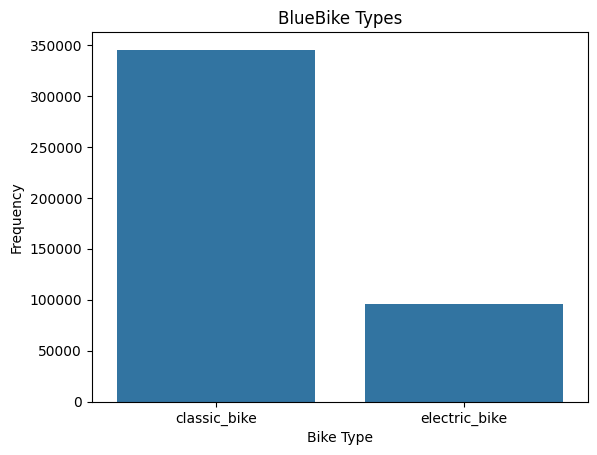

In [8]:
sns.countplot(data = blueBikes, x = "rideable_type")
plt.xlabel("Bike Type")
plt.ylabel("Frequency")
plt.title("BlueBike Types")

Are these bikes mostly used by members or casual riders (Ex. Day pass, single ride)?

Text(0.5, 1.0, 'Rider Types')

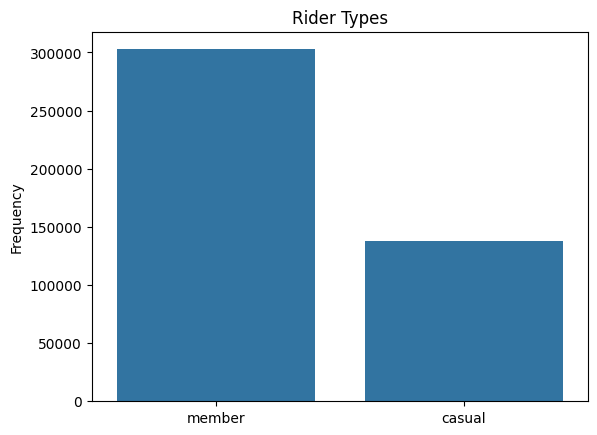

In [9]:
sns.countplot(data = blueBikes, x = "member_casual")
plt.xlabel("")
plt.ylabel("Frequency")
plt.title("Rider Types")

In [10]:
routes = blueBikes.groupby(["start_station_name", "end_station_name"])

Questions to Answer:

1. What does the distribution of bike ride lengths look like? What factors influence bike ride lengths?

2. What routes are most popular? What kinds of people take these routes? When do they take them?

3. Where are these stations located across the city?

4. How often are BlueBikes used? Are there any patterns?

With more history/station information:

5. Is there a seasonality to BlueBike usage? What does it look like throughout the year?

6. How do the most popular routes square with other information, such as MBTA stop locations and neighborhood info?

7. Are people taking BlueBikes solely within their own neighborhood? Are they traveling far/close?

8. Are there any instances of family/friend biking-- same start, same end, within ~15 minutes?

9. Model station usage. When are stations at peak capacity? Are there any stations that would benefit from expansion?

    One way of doing this:

    Using the ride history, simulate bike usage. General pseudocode:

    Start with a hash table where station id : bikes at station. Assume that each station starts with all bikes.

    Take earliest bike ride (using priority queue with start times as keys?). Update the start station's capacity
    by subtracting one bike. Update key of that ride to finish time, heapify down as needed.

    Continue in this manner: taking the next ride, either one that is just starting or one that is finishing. Update
    station capacities appropriately.

    We can print something if a station is ever empty.

    Alternatively:
    Pick a time of interest. Query ride history to look at only rides that are active during this time (i.e. start < x < finish>). Go through these rides and calculate station capacities

In [11]:
blueBikes.dtypes

ride_id                        object
rideable_type                  object
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                  object
ride_length           timedelta64[ns]
dtype: object

In [12]:
blueBikes_sorted = blueBikes.sort_values(by = "started_at")

In [13]:
min = blueBikes_sorted["started_at"].iloc[0]
max = blueBikes_sorted["started_at"].iloc[len(blueBikes_sorted["started_at"]) - 1]

print("The rides in this dataset range from " + str(min) + " to " + str(max))

The rides in this dataset range from 2024-05-01 00:01:28 to 2024-05-31 23:59:37


So, while this dataset was posted in June 2024, it really shows all of the rides in May 2024 (as we might expect-- they just pulled these data the month after!). It's interesting that the earliest and the latest rides are so close to the month's cutoffs-- who knew people rode at night! To help answer question 4 (above), it would be useful to plot both the monthly timeline of BlueBike usage, and look at the times of day that people ride Bluebikes the most-- in this second one, it would probably be useful to at least distinguish between weekdays and weekends

In [14]:
blueBikes["start_time"] = blueBikes["started_at"].apply(lambda x: x.time())
blueBikes["end_time"] = blueBikes["ended_at"].apply(lambda x: x.time())

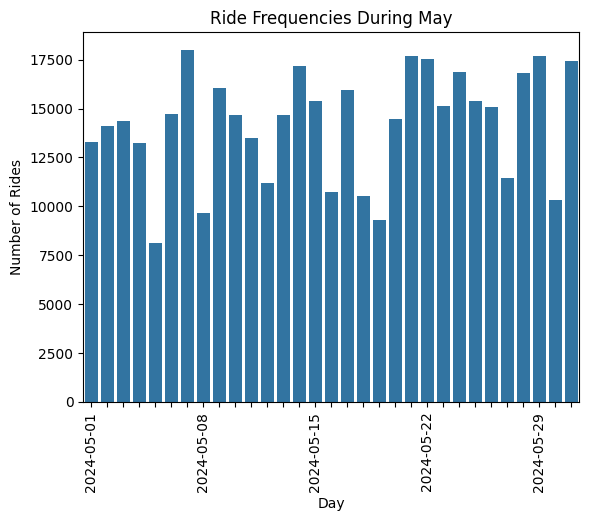

In [15]:
#I want a plot of BlueBike frequency over time.

#Set the index of my sorted blueBikes df to be the start datetime of the ride
blueBikes_sorted = blueBikes_sorted.set_index(pd.DatetimeIndex(blueBikes_sorted["started_at"]))

r = blueBikes_sorted.resample('D').size()

chart = sns.barplot(data = r)
plt.ylabel("Number of Rides")
plt.xlabel("Day")
plt.title("Ride Frequencies During May")
plt.xticks(rotation=90)

#Reduces number of x-labels
for ind, label in enumerate(chart.get_xticklabels()):
    if ind % 7 == 0:  # every 7th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

There's certainly some periodicity in this graph-- it looks like Sundays (like 5/5, with only 8103 rides) typically have lower ride counts, but the ride counts surge upwards pretty regularly each week. Let's look at closer at frequencies on each day of the week.

In [16]:
blueBikes["day_of_week"] = blueBikes["started_at"].apply(lambda x: x.dayofweek)

In [17]:
g = blueBikes.groupby("day_of_week").agg("size").reset_index()
days = {0: "Monday",
        1: "Tuesday",
        2: "Wednesday",
        3: "Thursday",
        4: "Friday",
        5: "Saturday",
        6: "Sunday"}
num_days = [4, 4, 5, 5, 5, 4, 4] #Number of days in May of each day (i.e. there are 4 Mondays)
g["avg_rides"] = g.apply(lambda x: x[0] / num_days[x["day_of_week"]], axis = 1)
g["day_name"] = g["day_of_week"].apply(lambda x: days[x])


In [18]:
check = r.reset_index()
check["day"] = check["started_at"].dt.day_name()

Text(0.5, 1.0, 'Weekly Ride Distribution in May 2024')

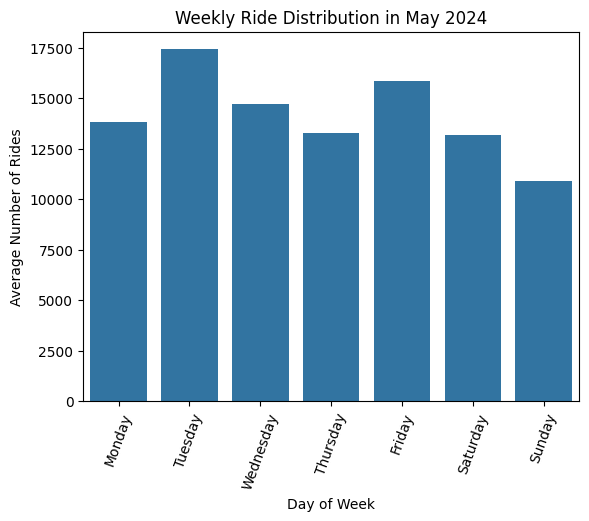

In [19]:
sns.barplot(data = g, x = "day_name", y = "avg_rides")
plt.xticks(rotation=70)
plt.xlabel("Day of Week")
plt.ylabel("Average Number of Rides")
plt.title("Weekly Ride Distribution in May 2024")

In [144]:
#What about times?
#I think I want to split this up by day as well

grouped_times = blueBikes_sorted.resample('h').size().reset_index() #Get counts for each hour of each day
grouped_times.rename(columns = {0: "count"}, inplace = True)
grouped_times["day_of_week_num"] = grouped_times["started_at"].apply(lambda x: x.dayofweek)
grouped_times["time"] = grouped_times["started_at"].apply(lambda x: x.time())

#Grouping by day of week + hour block, aggregating to get number of rides in each block
agg_groups = grouped_times.groupby(["day_of_week_num", "time"]).agg(num_rides=('count', 'sum')).reset_index()
agg_groups["avg_rides"] = agg_groups.apply(lambda x: x["num_rides"] / num_days[x["day_of_week_num"]], axis = 1)
agg_groups["day"] = agg_groups["day_of_week_num"].apply(lambda x: days[x])

C:\Users\aclar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


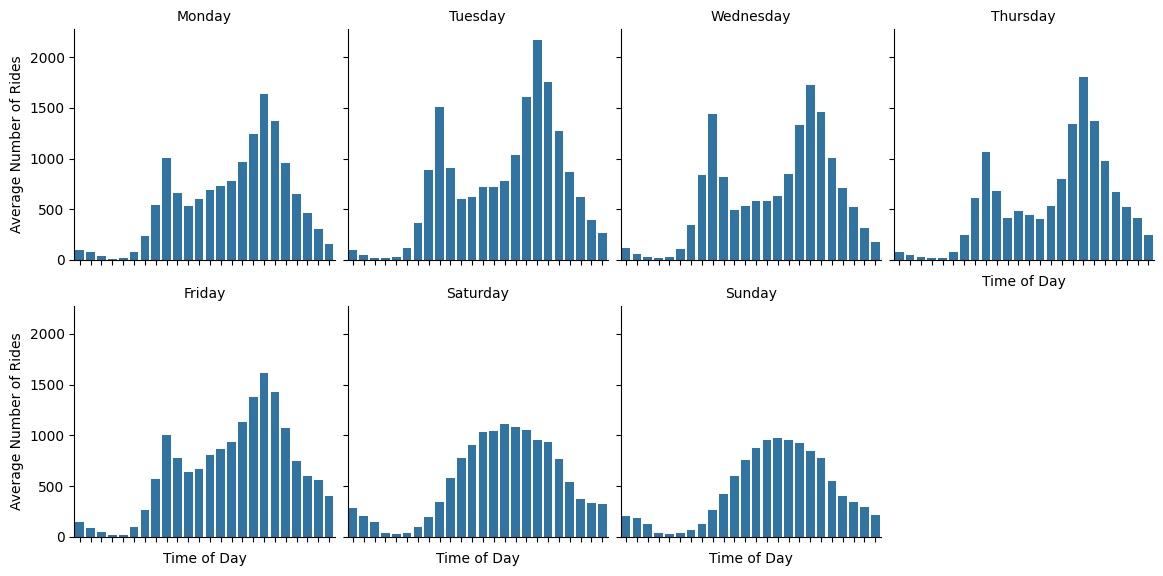

In [146]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

#Make facet grid-- one plot for each day of week
g = sns.FacetGrid(agg_groups, col = "day", col_wrap = 4, col_order = day_order)
g.map(sns.barplot, "time", "avg_rides")
g.set_axis_labels("Time of Day", "Average Number of Rides")
g.set_titles(col_template= "{col_name}")
g.figure.subplots_adjust(wspace=0.05, hspace = 0.2)
g.set_xticklabels("")

I wonder whether this could be communicated more effectively in a more condensed plot

In [149]:
agg_groups.set_index(["time"], inplace = True) #Setting index to Time to allow plotting

[Text(0.5, 0, 'Time of Day (Military)'), Text(0, 0.5, 'Average Rides')]

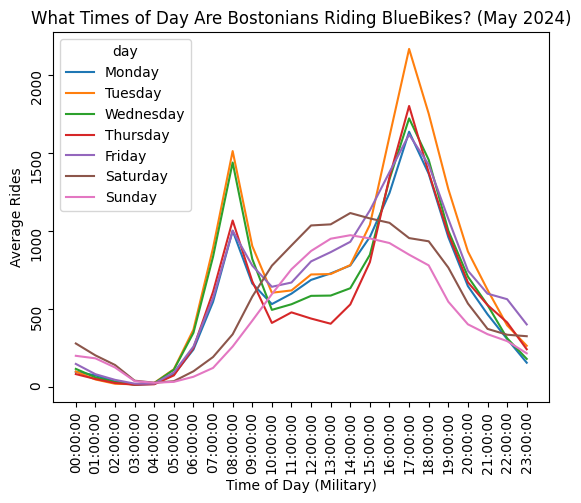

In [150]:
m = sns.lineplot(x = agg_groups.index.astype(str), y = agg_groups["avg_rides"], hue = agg_groups["day"], hue_order = day_order)
m.tick_params(labelrotation = 90)
m.set_title("What Times of Day Are Bostonians Riding BlueBikes? (May 2024)")
m.set(xlabel = "Time of Day (Military)", ylabel = "Average Rides")

(Updated for averages plot) We're seeing some interesting trends here. On weekdays, peak riding times are around 8:00 AM and 5:00 P.M., which correspond to when rush hour is. This perhaps indicates that many people use BlueBikes for their commutes to work. BlueBike rides are highest on Tuesdays and Wednesdays around these times. One potential explanation for this is that more people may work remotely on other days of the week, leading to slightly lower ridership.

For weekends, we see that there is a slower start to each day, with a gradual ramp up to peak ridership around 12:00 - 2:00 P.M. Saturday has more rides than Sunday, in general.

Interestingly, while most rides occur during daylight hours, there are some rides that occur during the evening and at night. From 3-4 AM, there are near zero rides, but there are still some. One question that makes me ask is: what kinds of rides are people taking at night? Are they long or short, from downtown to the outskirts of the city, by members or casual riders, etc? Also, if we were to look at other months, how does dwindling/increasing daylight affect BlueBike ridership? For that matter, how does weather affect BlueBike ridership? I would be more likely to ride at 10 PM in June than in December.

Notes on this plot: To fiddle with this more, I would add the Month info in a caption below the x-axis, refine the legend, and make the x-axis labels more readable times (perhaps less of them). It's important to remember that I grouped by hour, so this really is discrete data-- a barchart is certainly a more genuine portrayal of these data, but I like that the lineplots allow for comparison between groups. It's still important to understand each individual data point as corresponding to a time RANGE. I used average number of rides to account for the fact that in May, some days of the week had less occurences than others. This is important-- if we look only at sums across the month, Tuesday ridership seems low, but when we look at the average in each timeslot, we see that it's actually pretty high!

In [179]:
#Trip Length Analysis

#no_distance = blueBikes[blueBikes["start_station_id"] == blueBikes["end_station_id"]]
#There are a bunch of rides that start and end in the same place and that last for a very short amount of time
#Let's call those false starts-- and filter them out
#Trips with same start+end and total ride time <= 5 minutes --> false starts
#Longer trips with same start+end I guess could be "just going around the block," or using the bike for a whole circular loop

def is_false_start(ride):
    return ride["ride_length"] <= pd.Timedelta(2, unit = 'minute') or (ride["start_station_id"] == ride["end_station_id"] and ride["ride_length"] <= pd.Timedelta(5, unit = 'minute'))

blueBikes_no_falsies = blueBikes.loc[~ blueBikes.apply(is_false_start, axis = 'columns')]

leng = blueBikes_no_falsies[["ride_length", "member_casual"]]
leng.set_index(pd.TimedeltaIndex(leng["ride_length"]), inplace = True)
leng_by_minute = leng.resample("h").agg(num_rides = ("member_casual", "size"))

#You know what's interesting-- the BlueBike's website says that they filter out "false starts"-- rides that are
#just people like taking the bike out and putting it right back. But, in this dataset, I'm noticing rides with negative ride
#lengths that are like ~-2 seconds. What are these due to?
#It looks like there's just a handful of them. I'm going to filter them out.

[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, ''),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, '')]

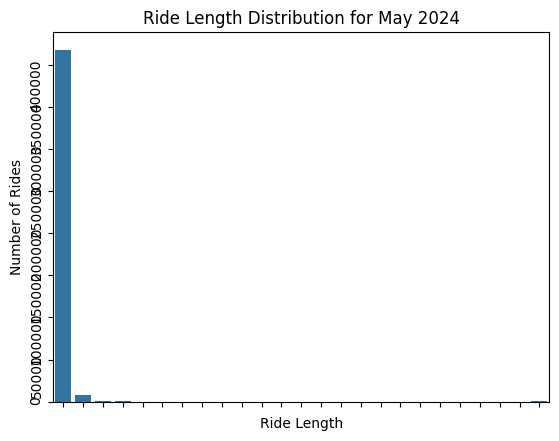

In [181]:
s = sns.barplot(x = leng_by_minute.index.astype(str), y = leng_by_minute["num_rides"])
s.set(xlabel = "Ride Length", ylabel = "Number of Rides", title = "Ride Length Distribution for May 2024")
s.tick_params(labelrotation = 90)
s.set_xticklabels([])

That is to say, the distribution of ride lengths is crazy skewed right! 417,000 rides in May took less than one hour, which is perhaps expected. The typical (median) ride is about 12 minutes long, and 75% of rides are less than 20 minutes long.

In [182]:
leng.describe()

,ride_length
count,428379
mean,0 days 00:18:36.744308194
std,0 days 00:53:09.967104626
min,0 days 00:02:01
25%,0 days 00:07:16
50%,0 days 00:12:00
75%,0 days 00:19:47
max,1 days 00:59:57


In [183]:
leng.groupby("member_casual").describe()

ride_length                             \
                    count                       mean   
member_casual                                          
casual             134978  0 days 00:29:09.028626887   
member             293401  0 days 00:13:45.864342657   

                                                                            \
                                     std              min              25%   
member_casual                                                                
casual         0 days 01:22:40.873151075  0 days 00:02:01  0 days 00:10:23   
member         0 days 00:30:07.468695863  0 days 00:02:01  0 days 00:06:25   

                                                                  
                           50%              75%              max  
member_casual                                                     
casual         0 days 00:17:02  0 days 00:28:16  1 days 00:59:57  
member         0 days 00:10:22  0 days 00:16:27  1 days 00:59:57

It looks like members tend to take shorter rides than casual riders. Perhaps this is because members pay a monthly subscription fee rather than a per ride fee, and so can better justify the cost of a short ride.

In [185]:
from ydata_profiling import ProfileReport

C:\Users\aclar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
